In [1]:
import numpy as np
import os
import sys
from os import listdir
from os.path import isfile, join, exists
import matplotlib.pyplot as plt
import time
import cortex
import importlib

from helpers import helpers

importlib.reload(helpers)

<module 'helpers.helpers' from '/user_data/jacobpri/Project/BOLD5000-GLMs/GLMsingle_paper/helpers/helpers.py'>

In [2]:
datasets = ['NSD','B5K']

info = dict()
info['B5K'] = dict()
info['NSD'] = dict()

info['B5K']['subjs'] = ['CSI1','CSI2','CSI3','CSI4']
info['NSD']['subjs'] = ['subj01','subj02','subj03','subj04']

info['methods'] = ['assumehrf', 'fithrf', 'fithrf_glmdenoise', 'fithrf_glmdenoise_rr']


In [4]:
reliability = dict()

masks = np.load('masks.npy',allow_pickle=True).item() 

# check to be sure all the datafiles exist
for ds in datasets:
    
    reliability[ds] = dict()
    
    for subj in info[ds]['subjs']:
        
        subj_version_list = []
        
        reliability[ds][subj] = dict()
            
        for method in info['methods']:
        
            metric_savefn = f'reliability_data/{ds}_{subj}_{method}_reliability.npy'
            
            rel = np.load(metric_savefn)
                    
            mask = masks[ds][subj]==1
            
            if np.ndim(rel) == 3:
                rel = rel[mask==1]
                
            print(ds,method,subj,rel.shape)
            
            reliability[ds][subj][method] = rel
            
            subj_version_list.append(rel)
                       
        reliability[ds][subj]['mean'] = np.mean(np.stack(subj_version_list,axis=1),axis=1)
        
        

NSD assumehrf subj01 (29723,)
NSD fithrf subj01 (29723,)
NSD fithrf_glmdenoise subj01 (29723,)
NSD fithrf_glmdenoise_rr subj01 (29723,)
NSD assumehrf subj02 (25655,)
NSD fithrf subj02 (25655,)
NSD fithrf_glmdenoise subj02 (25655,)
NSD fithrf_glmdenoise_rr subj02 (25655,)
NSD assumehrf subj03 (28033,)
NSD fithrf subj03 (28033,)
NSD fithrf_glmdenoise subj03 (28033,)
NSD fithrf_glmdenoise_rr subj03 (28033,)
NSD assumehrf subj04 (23155,)
NSD fithrf subj04 (23155,)
NSD fithrf_glmdenoise subj04 (23155,)
NSD fithrf_glmdenoise_rr subj04 (23155,)
B5K assumehrf CSI1 (17116,)
B5K fithrf CSI1 (17116,)
B5K fithrf_glmdenoise CSI1 (17116,)
B5K fithrf_glmdenoise_rr CSI1 (17116,)
B5K assumehrf CSI2 (17481,)
B5K fithrf CSI2 (17481,)
B5K fithrf_glmdenoise CSI2 (17481,)
B5K fithrf_glmdenoise_rr CSI2 (17481,)
B5K assumehrf CSI3 (15954,)
B5K fithrf CSI3 (15954,)
B5K fithrf_glmdenoise CSI3 (15954,)
B5K fithrf_glmdenoise_rr CSI3 (15954,)
B5K assumehrf CSI4 (16707,)
B5K fithrf CSI4 (16707,)
B5K fithrf_glmdenoi

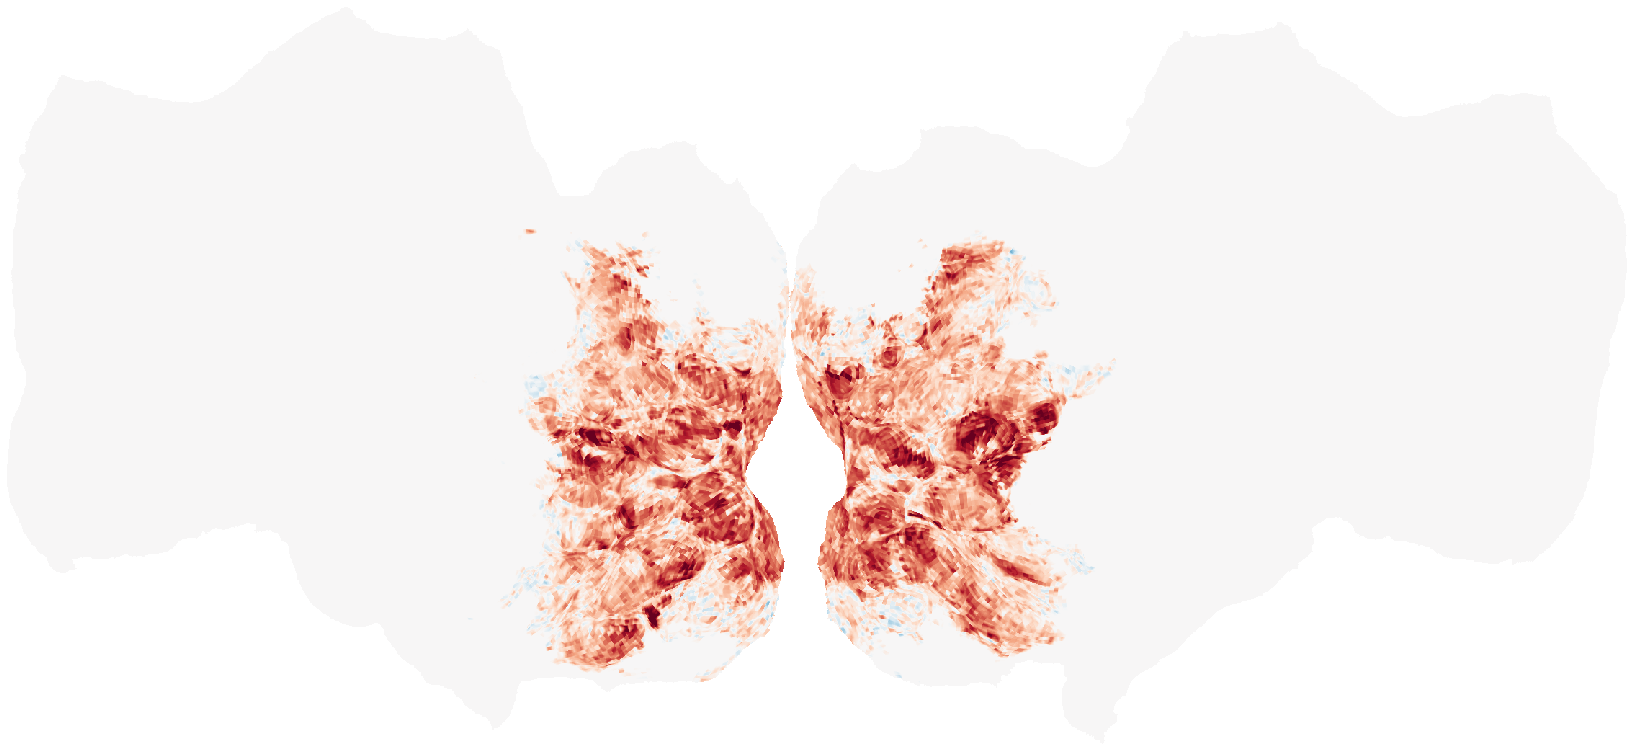

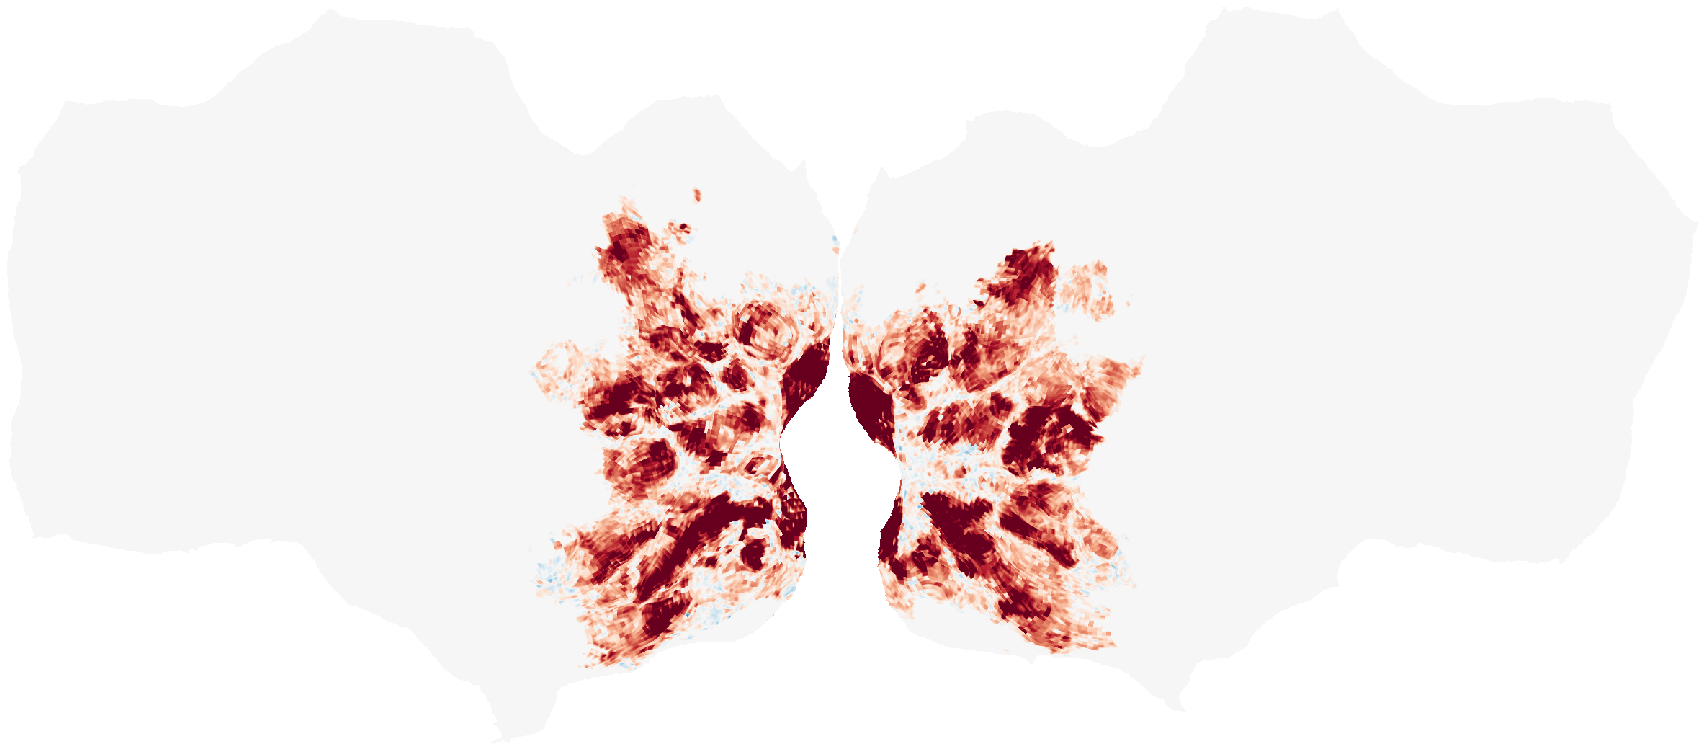

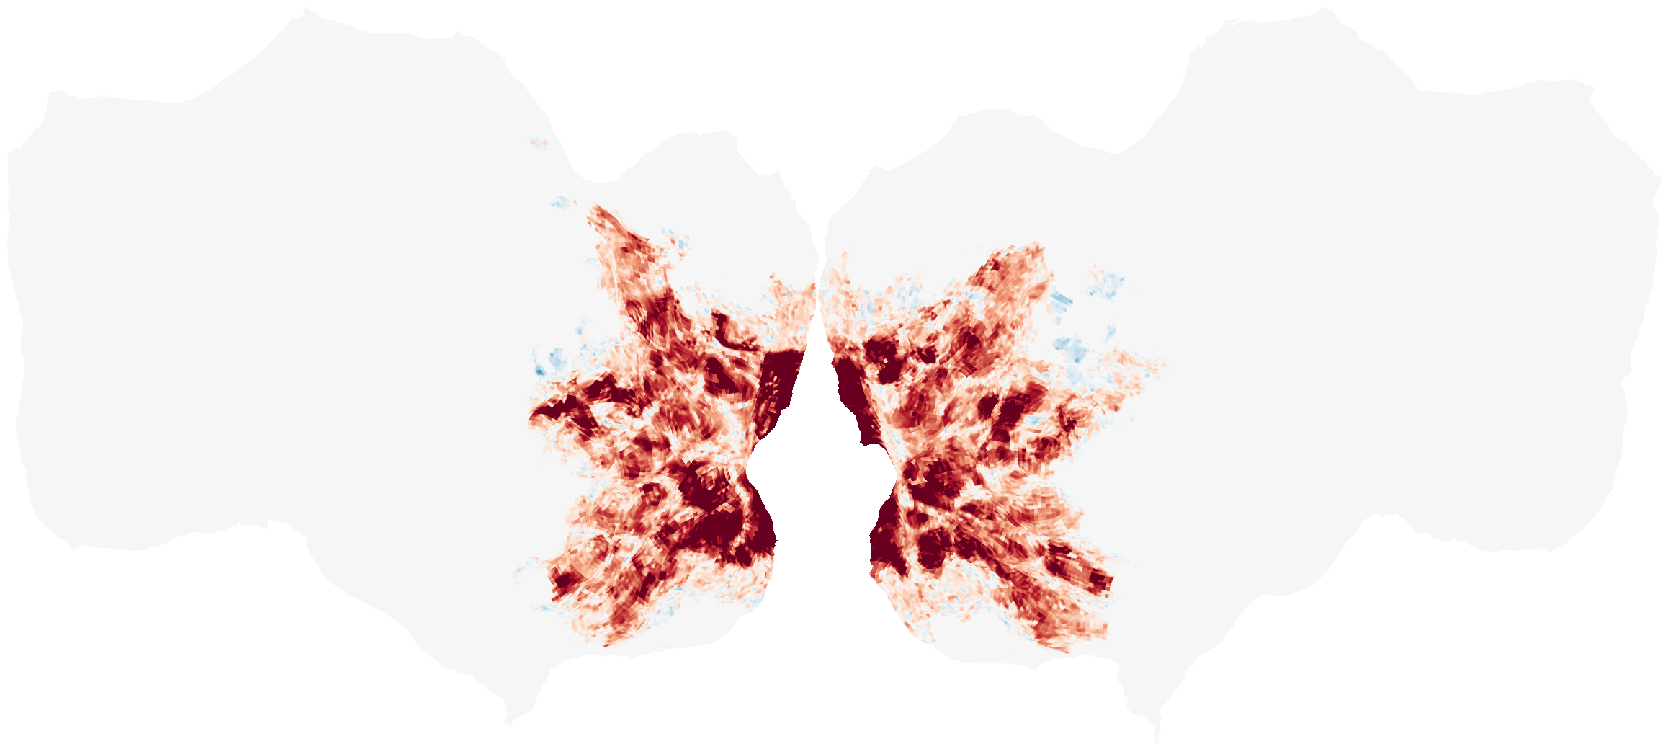

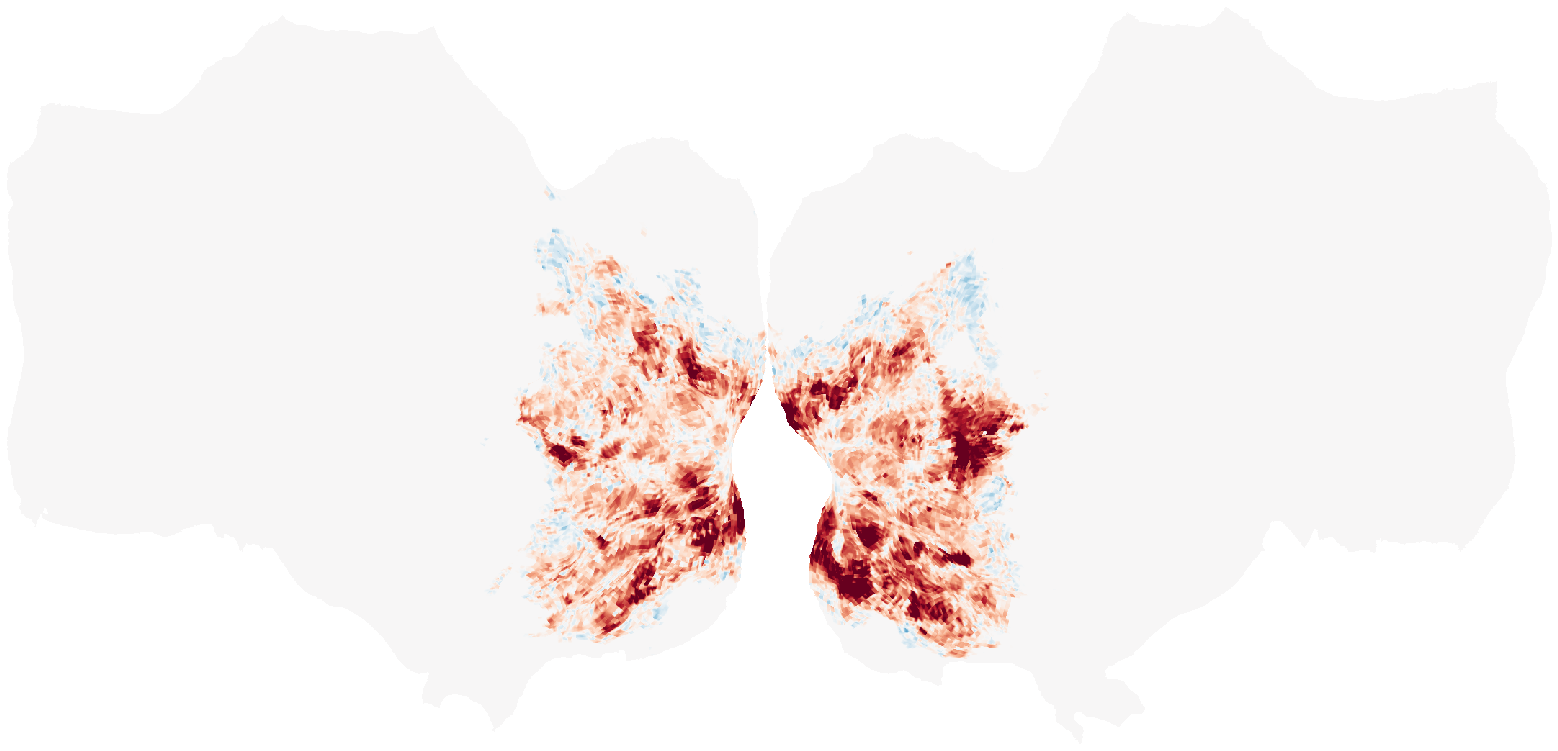

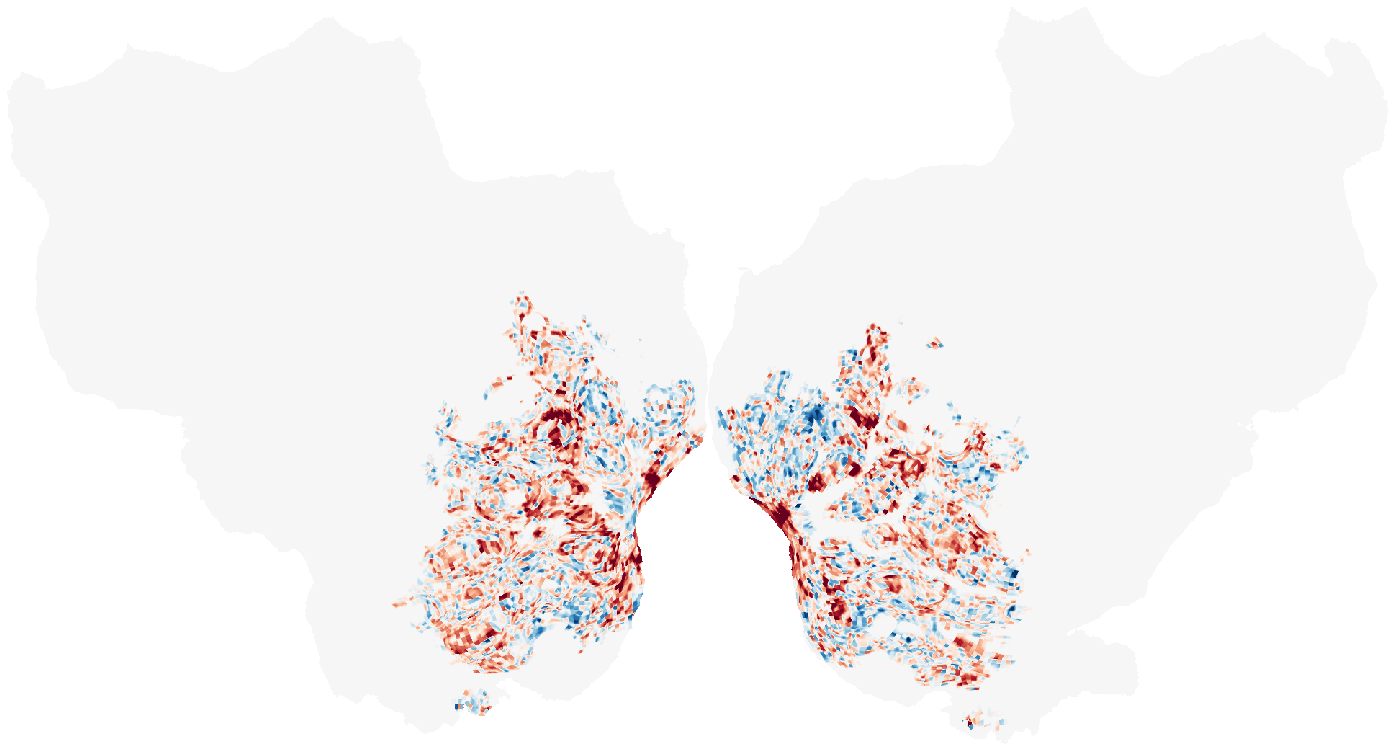

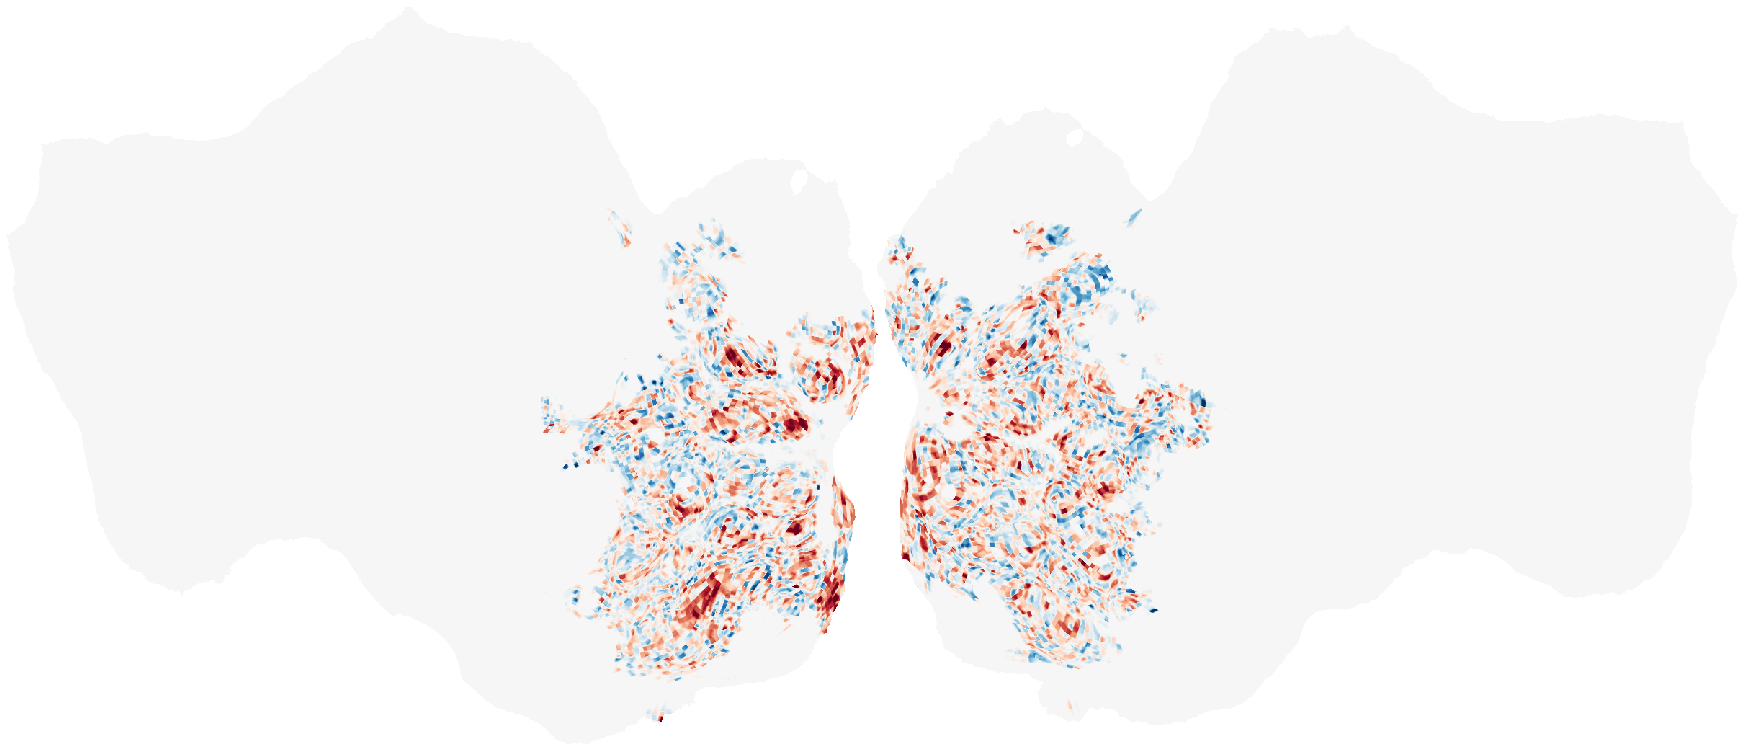

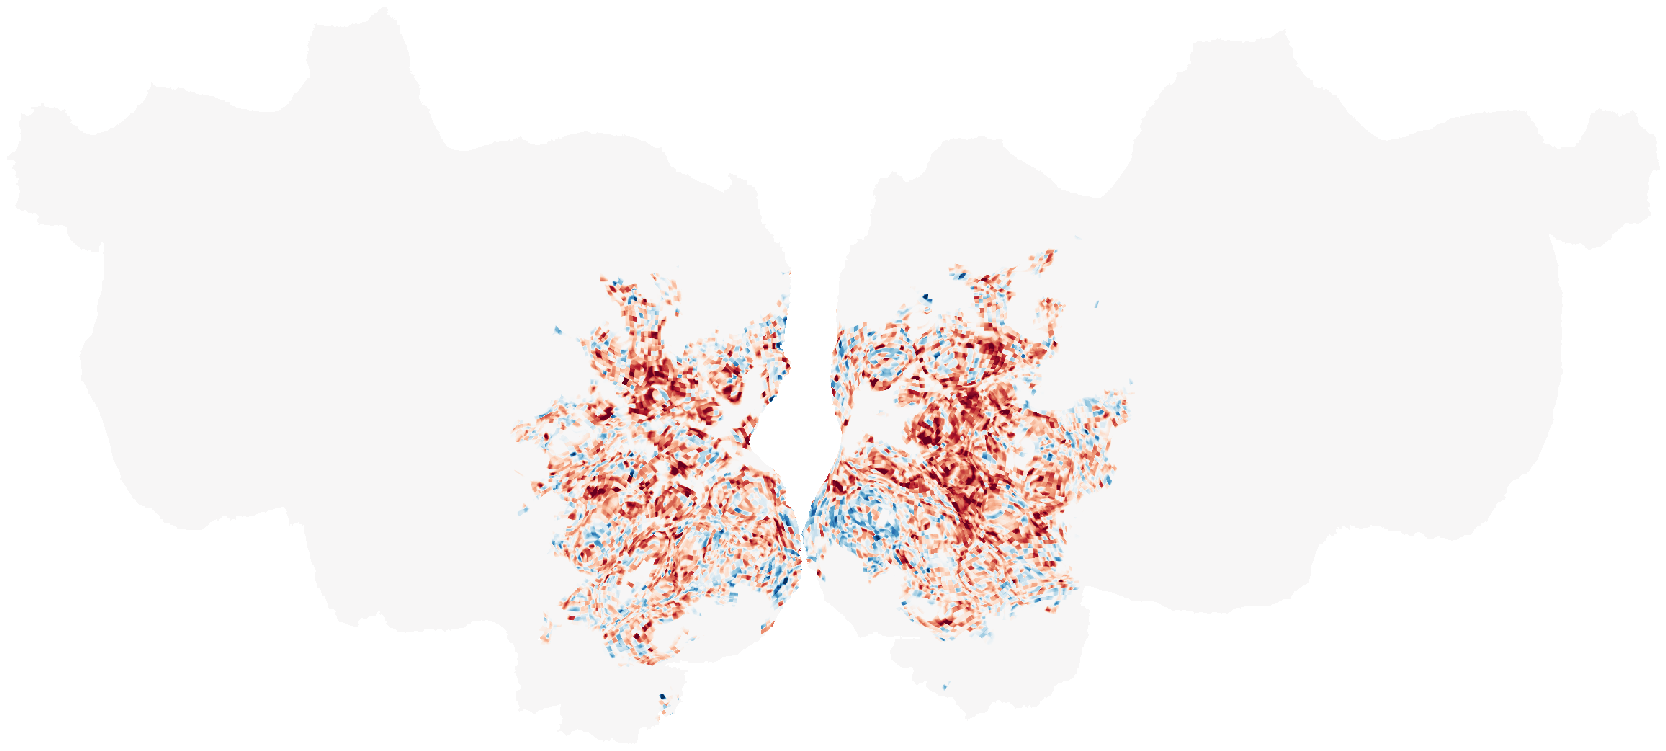

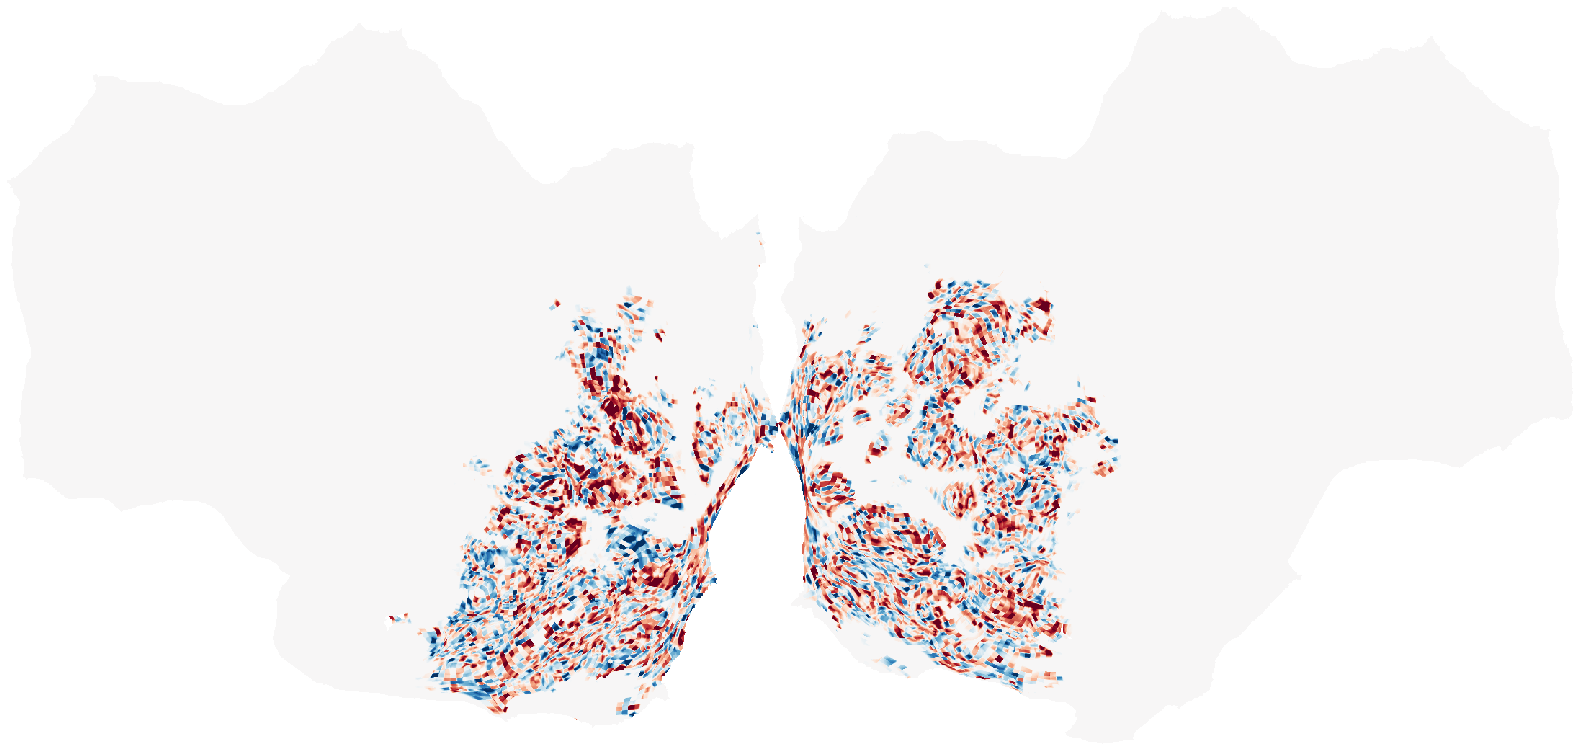

In [5]:
# iterate through datasets

for ds in ['NSD','B5K']:
    
    if ds == 'NSD':
        subjs = [f'subj0{n}' for n in range(1,5)]
    else:
        subjs = [f'CSI{n}' for n in range(1,5)]
        
    for subj in subjs:
        
        plot_data = reliability[ds][subj]['fithrf_glmdenoise_rr'] - reliability[ds][subj]['assumehrf']
        
        plot_data = helpers.reshape_nsdgeneral_to_volume(plot_data, masks[ds][subj])
        
        plot_data[masks[ds][subj] < 1] = 0
        
        _ = helpers.plot_flat_map(ds, subj, plot_data, title = f'', 
                          cmap = 'RdBu_r', vmin = -0.2, vmax = 0.2, colorbar=False)
        

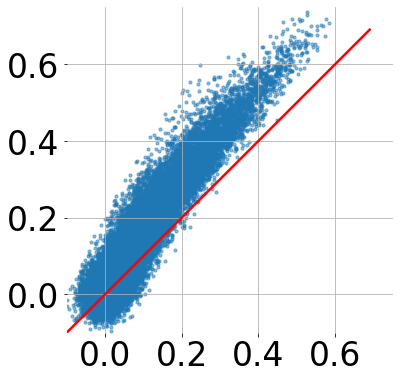

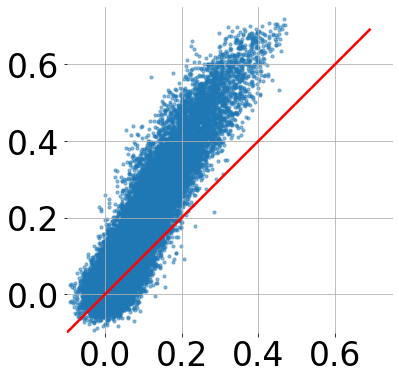

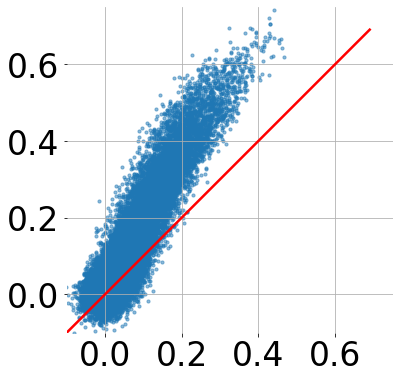

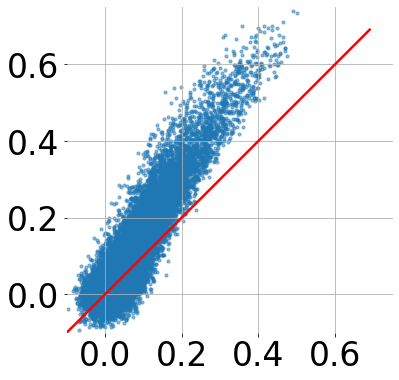

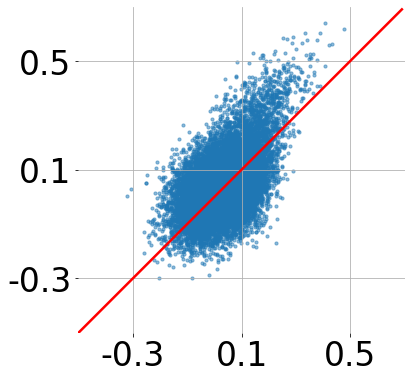

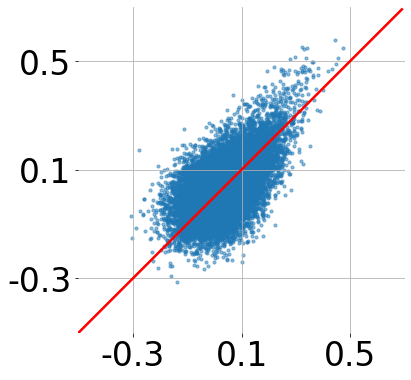

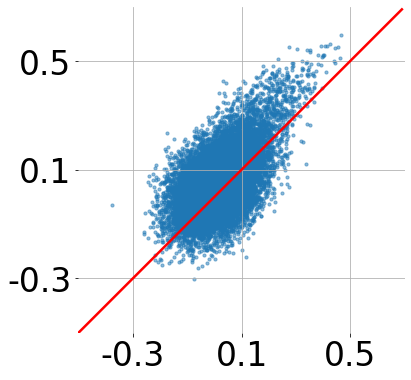

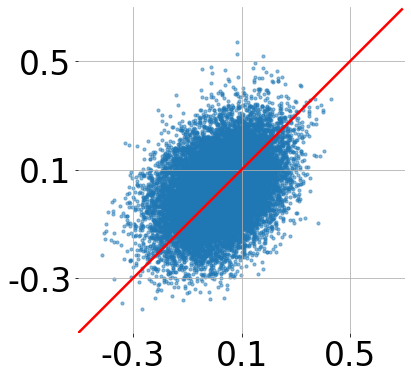

In [6]:
draw_plots = True

if draw_plots: 
    
    x_version = 'assumehrf'
    y_version = 'fithrf_glmdenoise_rr'

    # iterate through datasets
    for ds in ['NSD','B5K']:

        if ds == 'NSD':
            subjs = [f'subj0{n}' for n in range(1,5)]
        else:
            subjs = [f'CSI{n}' for n in range(1,5)]

        for subj in subjs:

            x = helpers.reshape_nsdgeneral_to_volume(reliability[ds][subj][x_version], masks[ds][subj])
            y = helpers.reshape_nsdgeneral_to_volume(reliability[ds][subj][y_version], masks[ds][subj])

            x[masks[ds][subj] < 1] = np.nan
            y[masks[ds][subj] < 1] = np.nan

            plt.figure(figsize=(6,6))
            plt.grid('on')
            plt.scatter(x, y, 10, alpha = 0.5)
            plt.axis('square')

            plt.plot(np.arange(-0.6,0.7,0.01),np.arange(-0.6,0.7,0.01),'r',linewidth=2.5,zorder=10)

            if ds == 'NSD':
                ticks = (0,0.8,0.2)
            else:
                ticks = (-0.3,0.8,0.4)

            plt.xticks(np.round(np.arange(ticks[0],ticks[1],ticks[2]),2),
                       np.round(np.arange(ticks[0],ticks[1],ticks[2]),2),fontsize=33)
            plt.yticks(np.round(np.arange(ticks[0],ticks[1],ticks[2]),2),
                       np.round(np.arange(ticks[0],ticks[1],ticks[2]),2),fontsize=33)

            if ds == 'NSD':
                plt.xlim([-0.1,0.75])
                plt.ylim([-0.1,0.75])
            else:
                plt.xlim([-0.5,0.7])
                plt.ylim([-0.5,0.7])

            # get rid of the frame
            for spine in plt.gca().spines.values():
                spine.set_visible(False)

            

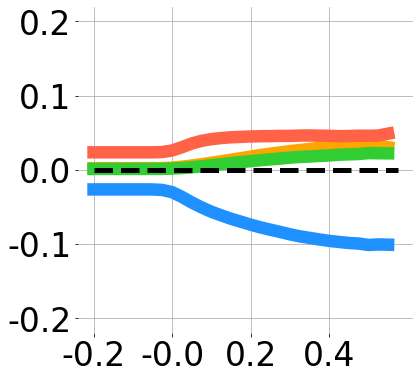

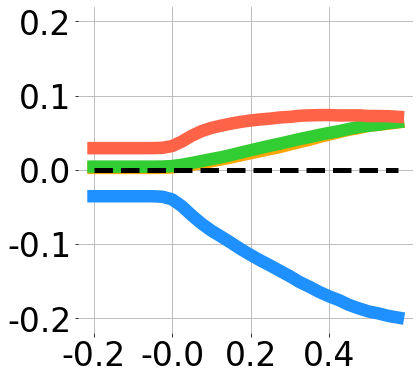

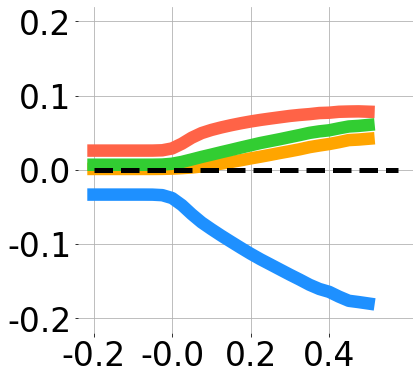

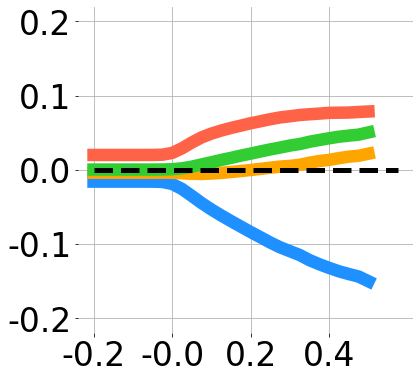

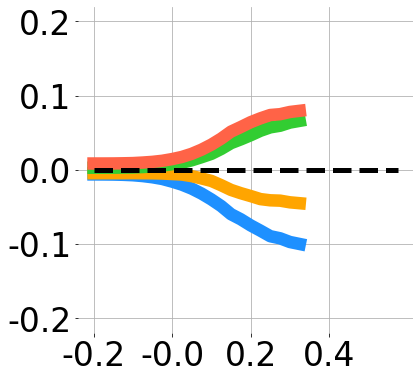

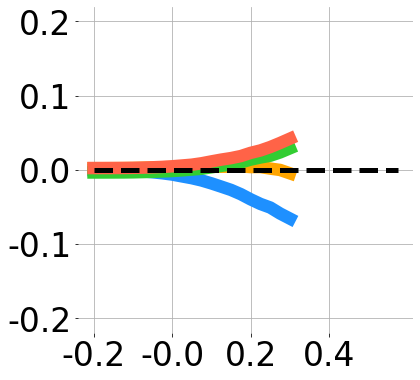

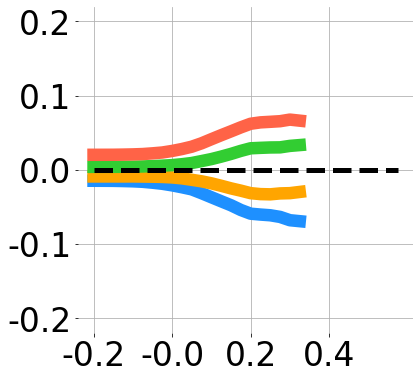

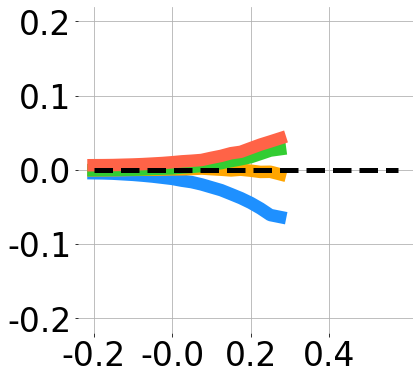

In [7]:
ft = 16

versions = ['assumehrf','fithrf','fithrf_glmdenoise','fithrf_glmdenoise_rr']
colors = ['dodgerblue','orange','limegreen','tomato']

bins  = np.round(np.arange(-0.2,0.6,0.025),3)

method = 'mean'
min_nvox = 100

allsubj_diffs = dict()

# iterate through datasets
for ds in ['NSD','B5K']:
    
    allsubj_diffs[ds] = dict()
    
    for version in versions:
        allsubj_diffs[ds][version] = []
        
    if ds == 'NSD':
        subjs = [f'subj0{n}' for n in range(1,5)]
    else:
        subjs = [f'CSI{n}' for n in range(1,5)]
            
    # iterate through subjects
    for subj in subjs:
                
        plt.figure(figsize=(6,6))
        
        subj_mean_metric = reliability[ds][subj]['mean']
        
        subj_version_diffs = []
        
        # iterate through versions
        v=0
        for version in versions:
            
            this_version = reliability[ds][subj][version]
            this_version_diffs = []
            this_version_stds = []
            for val in bins:
           
                validvox = subj_mean_metric > val
                
                if np.sum(validvox) > min_nvox:
                    if method == 'mean':
                        this_version_diffs.append(np.nanmean(this_version[validvox] - subj_mean_metric[validvox]))
                    elif method == 'median':
                        this_version_diffs.append(np.nanmedian(this_version[validvox] - subj_mean_metric[validvox]))
                    this_version_stds.append(np.nanstd(this_version[validvox] - subj_mean_metric[validvox]))
                else:
                    this_version_diffs.append(np.nan)
                    this_version_stds.append(np.nan)
                    
            
            subj_version_diffs.append(this_version_diffs)
            plt.plot(this_version_diffs,linewidth=12.5,color = colors[v],alpha=1)
            
            v+=1
            
            allsubj_diffs[ds][version].append(this_version_diffs)
        
        plt.plot(np.zeros((len(bins),)),'k--',linewidth=5)
        plt.xticks(np.arange(len(bins))[::8],np.array(bins[::8]),fontsize=ft);
        
        plt.yticks(np.round(np.arange(-0.2,0.3,0.1),2),np.round(np.arange(-0.2,0.3,0.1),2),fontsize=33)
        plt.ylim([-0.22,0.22])
      
        plt.xticks(fontsize=33)
        plt.yticks(fontsize=33)
        plt.grid('on')         
        # get rid of the frame
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
     

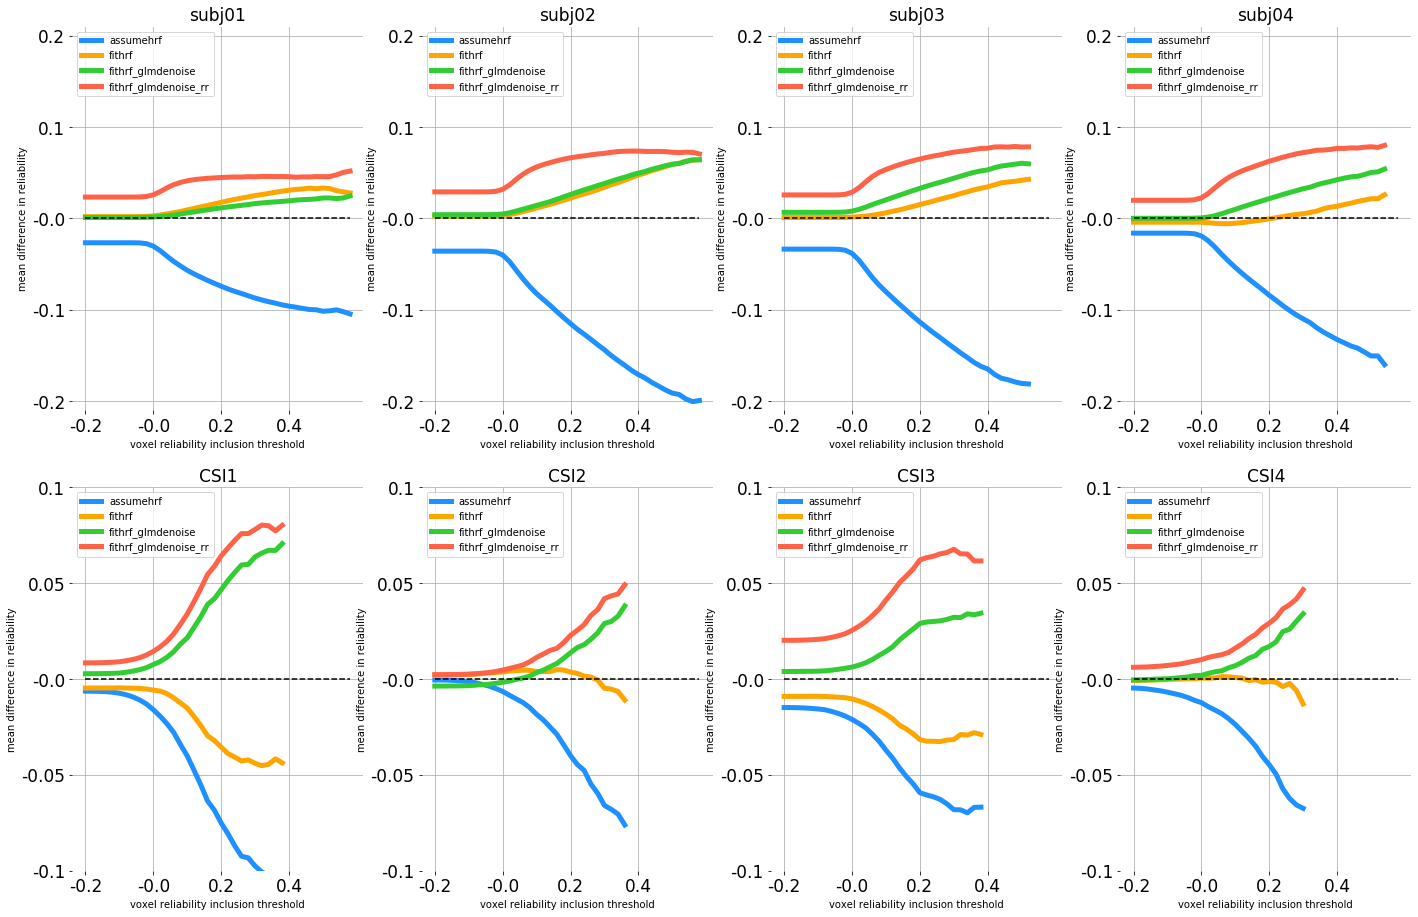

In [8]:
ft = 16
versions = ['assumehrf','fithrf','fithrf_glmdenoise','fithrf_glmdenoise_rr']
colors = ['dodgerblue','orange','limegreen','tomato']

bins  = np.round(np.arange(-0.2,0.6,0.02),3)

measure = 'mean'
min_nvox = 50

allsubj_diffs = dict()

for ds in datasets:
    allsubj_diffs[ds] = dict()
    for method in versions:
        allsubj_diffs[ds][method] = []

plt.figure(figsize=(24,24))
c = 1

# iterate through datasets
for ds in ['NSD','B5K']:
        
    if ds == 'NSD':
        subjs = [f'subj0{n}' for n in range(1,5)]
    else:
        subjs = [f'CSI{n}' for n in range(1,5)]
            
    # iterate through subjects
    for subj in subjs:
        
        plt.subplot(len(ds),4,c)
        
        subj_mean_metric = reliability[ds][subj]['mean']
        
        subj_version_diffs = []
        
        # iterate through versions
        v=0
        for method in versions:
    
            this_version = reliability[ds][subj][method]
            this_version_diffs = []
            this_version_stds = []
            for val in bins:
                
                validvox = subj_mean_metric > val
              
                if np.sum(validvox) > min_nvox:
                    if measure == 'mean':
                        this_version_diffs.append(np.nanmean(this_version[validvox] - subj_mean_metric[validvox]))
                    elif measure == 'median':
                        this_version_diffs.append(np.nanmedian(this_version[validvox] - subj_mean_metric[validvox]))
                    this_version_stds.append(np.nanstd(this_version[validvox] - subj_mean_metric[validvox]))
                else:
                    #print(val,'ahhh')
                    this_version_diffs.append(np.nan)
                    this_version_stds.append(np.nan)
                    
            
            subj_version_diffs.append(this_version_diffs)
            plt.plot(this_version_diffs,linewidth=5,color = colors[v])
            
            v+=1
            
            allsubj_diffs[ds][method].append(this_version_diffs)
        
        c+=1
        plt.plot(np.zeros((len(bins),)),'k--')
        plt.xticks(np.arange(len(bins))[::10],np.array(bins[::10]),fontsize=ft);
        
        if ds == 'NSD':
            plt.yticks(np.round(np.arange(-0.4,0.3,0.1),2),np.round(np.arange(-0.4,0.3,0.1),2),fontsize=ft)
            plt.ylim([-0.21,0.21])
        else:
            plt.yticks(np.round(np.arange(-0.4,0.3,0.05),2),np.round(np.arange(-0.4,0.3,0.05),2),fontsize=ft)
            plt.ylim([-0.1,0.1])
       
        plt.xticks(fontsize=ft+1)
        plt.yticks(fontsize=ft+1)
        plt.title(subj,fontsize=ft+1)
        plt.xlabel('voxel reliability inclusion threshold')
        plt.ylabel('mean difference in reliability')
        plt.grid('on')         
        plt.legend(versions,loc='upper left')
        # get rid of the frame
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
            

/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


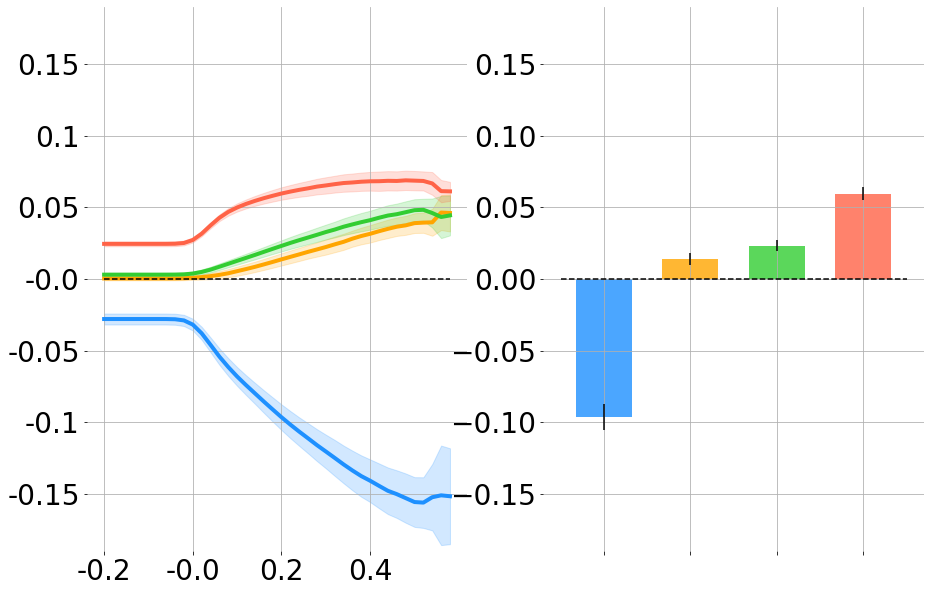

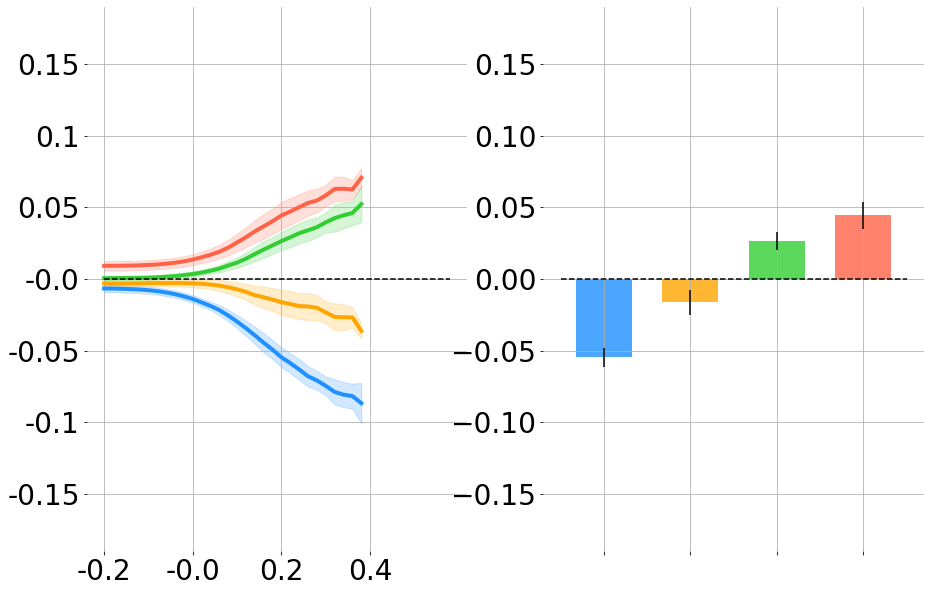

In [9]:
ft = 16
colors = ['dodgerblue','orange','limegreen','tomato','black']
colors_ = ['dodgerblue','orange','limegreen','tomato','black']

bins  = np.round(np.arange(-0.2,0.6,0.02),3)

bar_thresh = 0.2
bar_idx = np.squeeze(np.argwhere(bins == bar_thresh))

# iterate through versions
nsubjs = dict()
for ds in ['NSD','B5K']:
    
    plt.figure(figsize=(15,10))
    c = 0
    
    nsubjs[ds] = dict()
    for method in versions:
        nsubjs[ds][method] = []

        for i in range(len(bins)):
            nsubjs[ds][method].append(np.sum(~np.isnan(np.stack(allsubj_diffs[ds][method],axis=1)[i])))
        
    
    bar_vals = []
    bar_sems = []

    for method in versions:
        method_mean = np.nanmean(np.stack(allsubj_diffs[ds][method],axis=1),axis=1)
        method_std = np.nanstd(np.stack(allsubj_diffs[ds][method],axis=1),axis=1) / np.sqrt(np.array(nsubjs[ds][method]))
        
        lst = '-'

        plt.subplot(121)
        a = 0.2
        plt.fill_between(np.arange(len(bins)),np.array(method_mean)-np.array(method_std),
                         np.array(method_mean)+np.array(method_std),alpha=a,color=colors[c])


        lalpha = 1
        plt.plot(method_mean,linewidth=4,color = colors[c],linestyle = lst,alpha=lalpha)

        bar_vals.append(method_mean[bar_idx])
        bar_sems.append(method_std[bar_idx])

        c+=1

    plt.plot(np.zeros((len(bins),)),'k--')
    plt.xticks(np.arange(len(bins))[::10],np.array(bins[::10]),fontsize=ft);

    plt.yticks(np.round(np.arange(-0.4,0.3,0.05),2),np.round(np.arange(-0.4,0.3,0.05),2),fontsize=ft+12)
    plt.ylim([-0.19,0.19])

    plt.xticks(fontsize=ft+12)
    plt.yticks(fontsize=ft+12)

    plt.grid('on')         

    # get rid of the frame
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.subplot(122)
    bars = plt.bar(np.arange(len(bar_vals)),np.array(bar_vals),yerr=np.array(bar_sems),
                   color=colors_[:-1],alpha=0.8,linewidth=2,width=0.65)

    plt.plot(np.arange(len(bar_vals)+1)-0.5,np.zeros((len(bar_vals)+1,)),'k--')
    plt.xticks(fontsize=ft+12)
    plt.yticks(fontsize=ft+12)
    plt.ylim([-0.19,0.19])
    plt.xticks(np.arange(len(bar_vals)),np.array(['' for i in range(len(bar_vals))]))
    plt.grid('on')         
    # get rid of the frame
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

